In [1]:
# /*******************************************************************************
# *  script      : proyecto final_modelos y aprendisaje.ipynb
# *  path        : n/a
# *  author      : Bolivar Alvarez
# *  release     : 1.|
# *  server      : Local
# *  instance    : n/a
# *  schema      : n/a
# *  assumptions : n/a
# *  uses        : n/a
# *  used by     : n/a
# *  parameters  : n/a
# *
# *******************************************************************************/


Se creat data set de entramiento para predecir si es maligno o benigno el cancer se excluye la columna 1 del dataset

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('wdbc.data')

X_train, X_test, Y_train, Y_test = train_test_split(df.drop(df.columns[1],axis=1), df[df.columns[1]], test_size=0.25, random_state=42)

Se revisa la prediccion usando una red neural 

In [3]:
from sklearn.neural_network import MLPClassifier

clf_nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=42)
clf_nn.fit(X_train,Y_train)

c:\Users\balvarez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=42,
              solver='lbfgs')

se revisa la prediccion usando un forest tree

In [4]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

Se revisa la prediccion usando gradiente

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gb = GradientBoostingClassifier(n_estimators=5, learning_rate=0.1, random_state=42)
clf_gb.fit(X_train,Y_train) 

GradientBoostingClassifier(n_estimators=5, random_state=42)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
    plt.title(title)
    plt.xlabel("Clase verdadera")
    plt.ylabel("Clase predicha")
    plt.show()

Se procede a graficar acurancy y las matris de confucion para comparar y sacar concluciones

del modelo de red nueronal

0.6126760563380281


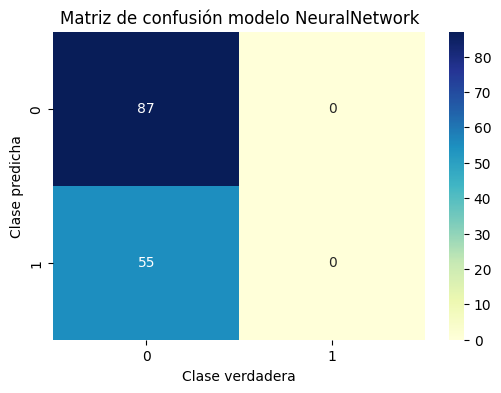

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_nn_pred = clf_nn.predict(X_test)
ac_nn = accuracy_score(Y_test,y_nn_pred)
print(ac_nn)

cm_nn= confusion_matrix(Y_test,y_nn_pred)
plot_confusion_matrix(cm_nn, "Matriz de confusión modelo NeuralNetwork")

del modelo de random forest

0.9366197183098591


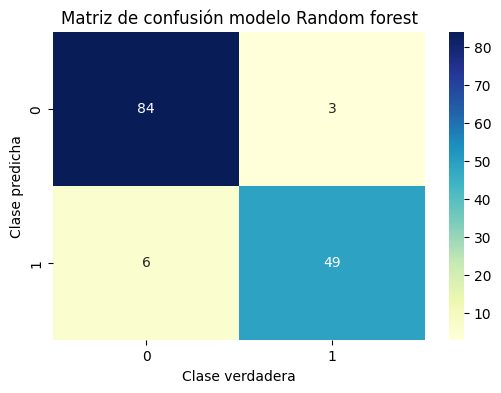

In [8]:
y_rf_pred = clf_rf.predict(X_test)
ac_rf = accuracy_score(Y_test,y_rf_pred)
print(ac_rf)

cm_rf= confusion_matrix(Y_test,y_rf_pred)
plot_confusion_matrix(cm_rf, "Matriz de confusión modelo Random forest")

del modelo de gradiente

0.9014084507042254


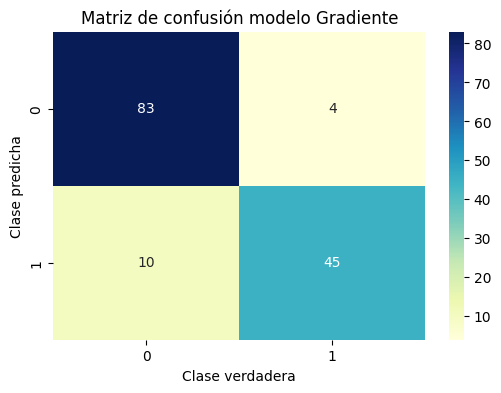

In [9]:
y_gb_pred = clf_gb.predict(X_test)
ac_gb = accuracy_score(Y_test,y_gb_pred)
print(ac_gb)

cm_gb= confusion_matrix(Y_test,y_gb_pred)
plot_confusion_matrix(cm_gb, "Matriz de confusión modelo Gradiente")